## The Perceptron Learning Algorithm

The perceptron is the simplest neural network, consisting of a single neuron. It is a supervised learning algorithm used for linear binary classification. The neuron takes in all inputs and multiplies them by their weights, then adds these values to get the weighted sum. The weighted sum is them passed through an activation function to obtain the output. 

<img src="neuron.jpeg" width=600 />

In this notebook we will use the following packages:
- [RDatasets](https://github.com/JuliaStats/RDatasets.jl)
- [Plots](http://docs.juliaplots.org/latest/)

In [31]:
using RDatasets
using Plots
theme(:ggplot2)

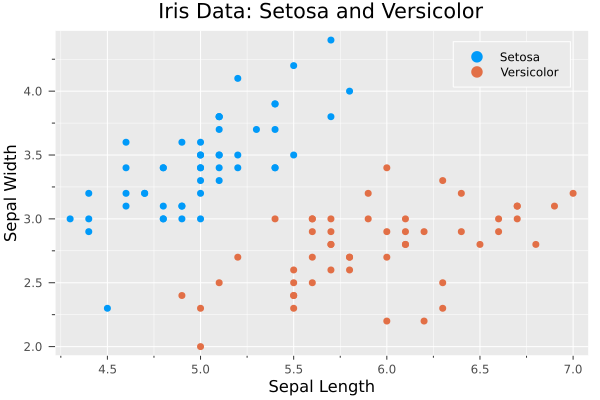

In [19]:
iris = dataset("datasets", "iris")

x_data = [x for x in zip(iris.SepalLength[1:100], iris.SepalWidth[1:100])]
y_data = [y == "setosa" ? 1 : -1 for y in iris.Species[1:100]]


scatter(x_data[1:50],
        label = "Setosa",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        title = "Iris Data: Setosa and Versicolor")

scatter!(x_data[51:100],
         label = "Versicolor")

In [20]:
function sign(weights, x)
    x̄ = [1.0, x[1], x[2]]
    return weights'x̄ > 0 ? 1 : -1
end


function perceptron_update_rule(weights, x, y)
    if sign(weights, x) != y
        weights += y * [1.0, x[1], x[2]]
    end
    
    return weights
end

perceptron_update_rule (generic function with 1 method)

In [21]:
function PLA(X, Y; epochs = 1000)
    w = randn(3)
    
    counter = 1
    while counter < epochs
        for i = 1:length(X)
            w = perceptron_update_rule(w, X[i], Y[i])
        end
        counter += 1
    end
    
    return w
end

PLA (generic function with 1 method)

In [22]:
w = PLA(x_data, y_data)

3-element Vector{Float64}:
 120.10807737434794
 -77.71942361767708
  99.8558131898463

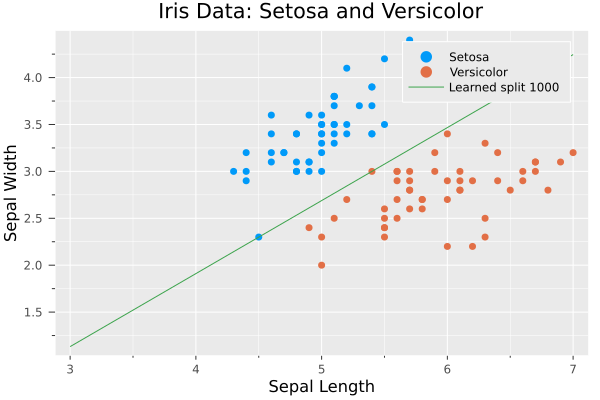

In [23]:
plot!([(x, (-w[2] * x - w[1]) / w[3]) for x = 3:7],
    label = "Learned split 1000")

In [7]:
function predictor(weights, x)
    return sign(weights, x) == 1 ? "setosa" : "versicolor"
end

predictor (generic function with 1 method)

In [29]:
k = rand([1, 100])
println("The true label is: ", iris.Species[k])
println("The predicted label is: ", predictor(w, (iris.SepalLength[k], iris.SepalWidth[k])))

The true label is: versicolor
The predicted label is: versicolor
